필요한 패키지 import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import fashion_mnist

패션아이템 이미지 데이터셋 로드

In [ ]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

In [ ]:
print('x_train shape:'+str(x_train.shape))
print('y_train shape:'+str(y_train.shape))
print('x_test shape:'+str(x_test.shape))
print('y_test shape:'+str(y_test.shape))

x_train shape:(60000, 28, 28)
y_train shape:(60000,)
x_test shape:(10000, 28, 28)
y_test shape:(10000,)


* 이미지의 크기는 28x28 픽셀임.
* train data는 60,000개, test data는 10,000개로 이루어져 있음.


* imshow는 원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림임. 쉽게말하면 원하는 크기의 행렬을 만들어서 각 칸을 원하는 색으로 채우는 것

Text(0.5, 1.0, '9')

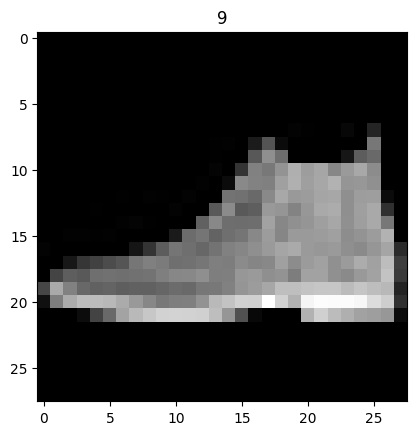

In [ ]:
plt.imshow(x_test[0], cmap = 'gray')
plt.title(y_test[0])

* xticks와 yticks는 x축, y축 범례를 뜻합니다. 이미지를 출력할 것이기 때문에 빈칸('[ ]')으로 설정

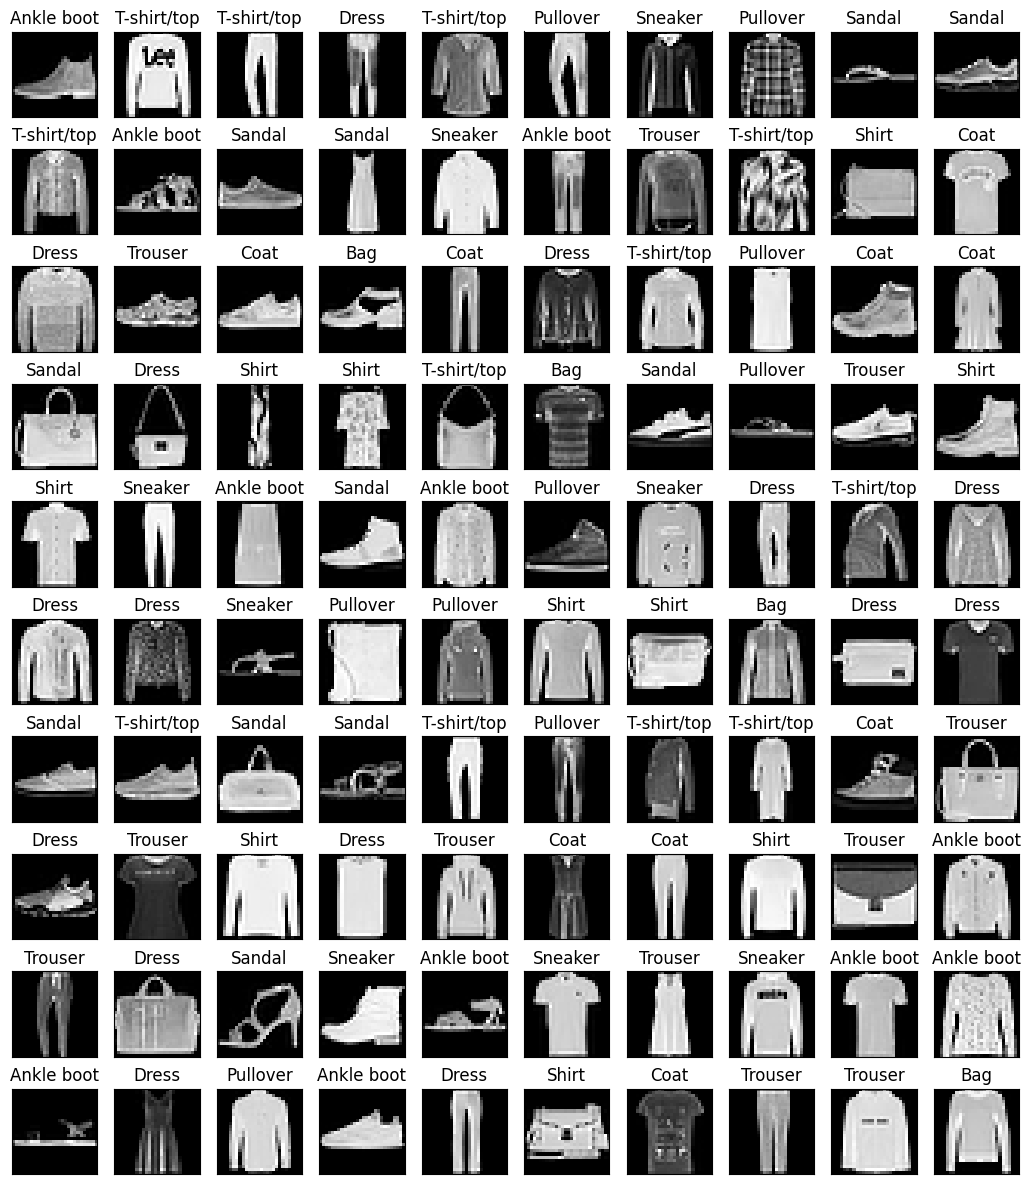

In [ ]:
fig, axes = plt.subplots(nrows = 10, ncols = 10, figsize = (13,15), subplot_kw = {'xticks': [], 'yticks': []})

labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i], cmap = 'gray')
    title = labels[y_train[i]]
    ax.set_title(title)

plt.show()

데이터 전처리
* 3차원(샘플수,세로,가로)를 4차원(샘플수,세로,가로,채널)으로 변경
* 정수를 실수로 변경
* 0\~255사이의 수치를 0.0~1.0사이로 정규화

라벨 전처리
* 0~9 라벨에 대한 원핫인코딩 수행

In [ ]:
x_train = x_train.reshape(60000,28,28,1).astype('float32')/255.0
x_test = x_test.reshape(10000,28,28,1).astype('float32')/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Convolution 신경망을 구성

In [ ]:
model = Sequential([
    Conv2D(32,(3,3), padding = 'same', input_shape = (28,28,1), activation = 'relu'),
    Conv2D(32,(3,3), padding = 'same',  activation = 'relu'),
    Conv2D(32,(3,3), padding = 'same',  activation = 'relu'),
    Conv2D(32,(3,3), padding = 'same',  activation = 'relu'),
    Conv2D(32,(3,3), padding = 'same',  activation = 'relu'),
    Conv2D(32,(3,3), padding = 'same',  activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(128,(3,3), padding = 'same',  activation = 'relu'),
    Conv2D(64,(3,3), padding = 'same',  activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64,(3,3), padding = 'same',  activation = 'relu'),
    Conv2D(64,(3,3), padding = 'same',  activation = 'relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dense(1024, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0

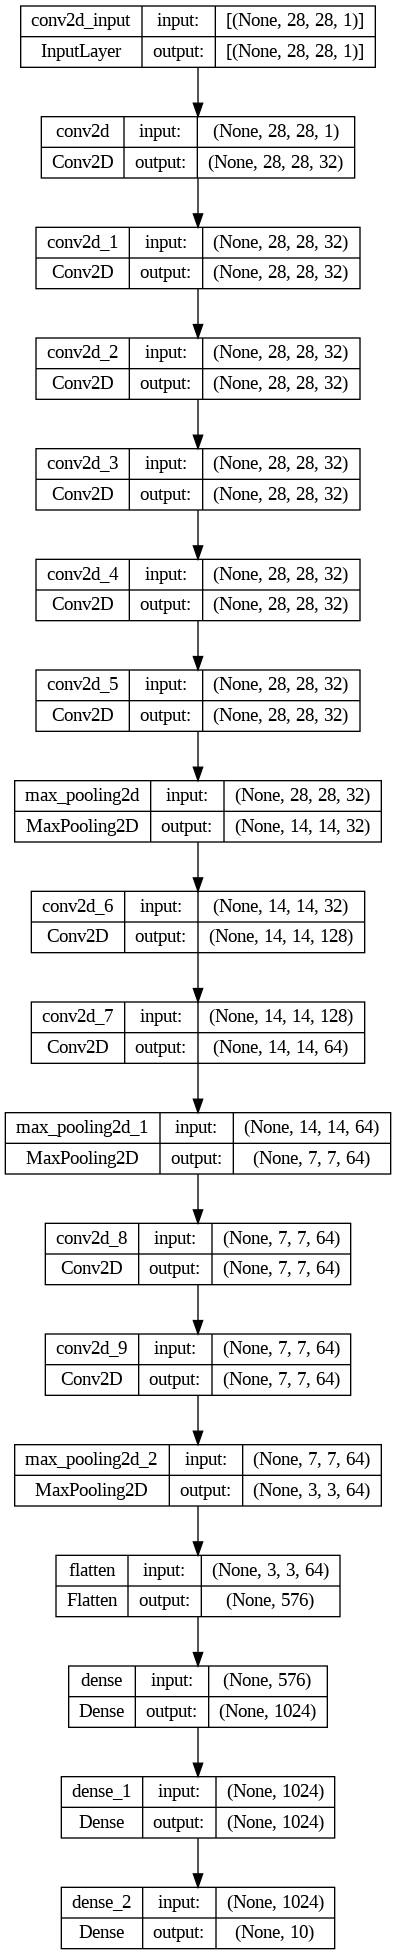

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
checkpoint_callback = ModelCheckpoint('best_model.h5',save_bset_only = True, monitor = 'val_loss')

hist = model.fit(x_train, y_train, validation_split = 0.2, batch_size = 32, epochs = 100, callbacks = [checkpoint_callback])

Epoch 1/100
1500/1500 [==============================] - 26s 10ms/step - loss: 0.4716 - accuracy: 0.8259 - val_loss: 0.3643 - val_accuracy: 0.8696
Epoch 2/100
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2951 - accuracy: 0.8904 - val_loss: 0.2930 - val_accuracy: 0.8889
Epoch 3/100
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2551 - accuracy: 0.9055 - val_loss: 0.2611 - val_accuracy: 0.9070
Epoch 4/100
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2324 - accuracy: 0.9149 - val_loss: 0.2492 - val_accuracy: 0.9091
Epoch 5/100
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2085 - accuracy: 0.9231 - val_loss: 0.2386 - val_accuracy: 0.9191
Epoch 6/100
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1951 - accuracy: 0.9301 - val_loss: 0.2385 - val_accuracy: 0.9151
Epoch 7/100
1500/1500 [==============================] - 14s 10ms/step - loss: 0.1806 - accuracy: 0.9335 - val_loss: 0.2